# investing.com data
# APPL (2003.08.04 ~ 2023.6.12)

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
#from tensorflow.keras.optimizers import Adam

In [650]:
appl = pd.read_csv("data/AAPL_investing.csv")
appl

,Date,Price,Open,High,Low,Vol.,Change %
0,08/04/2023,181.99,185.52,187.38,181.92,114.75M,-4.80%
1,08/03/2023,191.17,191.57,192.37,190.69,52.60M,-0.73%
2,08/02/2023,192.58,195.04,195.18,191.85,48.90M,-1.55%
3,08/01/2023,195.60,196.24,196.73,195.28,34.73M,-0.43%
4,07/31/2023,196.45,196.06,196.49,195.26,38.59M,0.32%
...,...,...,...,...,...,...,...
899,01/08/2020,75.80,74.29,76.11,74.29,132.36M,1.61%
900,01/07/2020,74.60,74.96,75.22,74.37,111.51M,-0.47%
901,01/06/2020,74.95,73.45,74.99,73.19,118.58M,0.79%
902,01/03/2020,74.36,74.29,75.14,74.12,146.54M,-0.97%


In [651]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      904 non-null    object 
 1   Price     904 non-null    float64
 2   Open      904 non-null    float64
 3   High      904 non-null    float64
 4   Low       904 non-null    float64
 5   Vol.      904 non-null    object 
 6   Change %  904 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.6+ KB


In [652]:
appl = appl.dropna(axis=0)
appl.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [653]:
appl["Date"] = pd.to_datetime(appl["Date"])
appl = appl.set_index("Date")
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114.75M,-4.80%
2023-08-03,191.17,191.57,192.37,190.69,52.60M,-0.73%
2023-08-02,192.58,195.04,195.18,191.85,48.90M,-1.55%
2023-08-01,195.60,196.24,196.73,195.28,34.73M,-0.43%
2023-07-31,196.45,196.06,196.49,195.26,38.59M,0.32%
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132.36M,1.61%
2020-01-07,74.60,74.96,75.22,74.37,111.51M,-0.47%
2020-01-06,74.95,73.45,74.99,73.19,118.58M,0.79%


In [654]:
def convertVol(num):
    if type(num) == float or type(num) == int:
        return num
    elif 'K' in num:
        return float(num.replace('K', '')) * 1000
    elif 'M' in num:
        return float(num.replace('M', '')) * 1000000 
    elif 'B' in num:
        return float(num.replace('B', '')) * 1000000000
    
appl['Vol.'] = appl['Vol.'].apply(convertVol)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80%
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73%
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55%
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43%
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32%
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61%
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47%
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.79%


In [655]:
def convertCharge(num):
    if type(num) == float or type(num) == int:
        return num
    elif '%' in num:
        return float(num.replace('%', ''))
    
appl["Change %"] = appl["Change %"].apply(convertCharge)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.79


In [656]:
appl.describe()

,Price,Open,High,Low,Vol.,Change %
count,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000
mean,136.147002,136.017334,137.683363,134.470752,1.036689e+08,0.124646
std,31.826976,31.823276,32.002146,31.648144,5.518545e+07,2.196841
min,56.090000,57.020000,57.120000,53.150000,3.146000e+07,-12.870000
25%,120.940000,120.500000,122.477500,119.120000,6.902750e+07,-0.952500
50%,142.600000,142.415000,144.230000,140.580000,8.878000e+07,0.075000
75%,157.695000,158.642500,160.405000,155.485000,1.205575e+08,1.350000
max,196.450000,196.240000,198.230000,195.280000,4.268800e+08,11.970000


<AxesSubplot: >

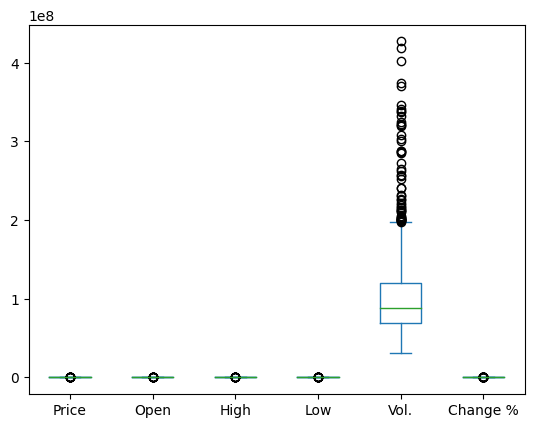

In [657]:
appl.plot.box()

Text(0, 0.5, 'Price')

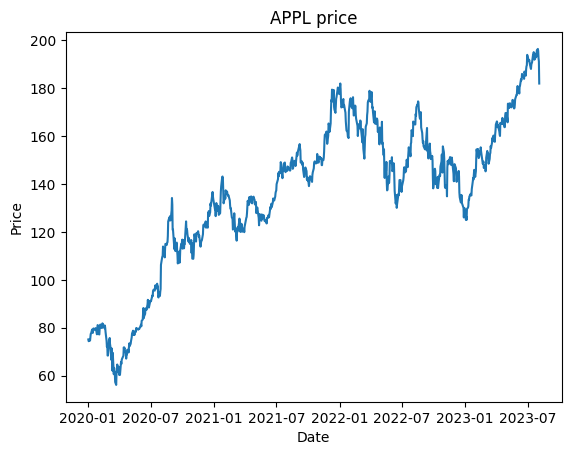

In [658]:
plt.plot(appl.index, appl["Price"])
plt.title("APPL price")
plt.xlabel("Date")
plt.ylabel("Price")

In [659]:
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32
...,...,...,...,...,...,...
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47
2020-01-06,74.95,73.45,74.99,73.19,118580000.0,0.79


In [660]:
appl.iloc[:-1]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-08-04,181.99,185.52,187.38,181.92,114750000.0,-4.80
2023-08-03,191.17,191.57,192.37,190.69,52600000.0,-0.73
2023-08-02,192.58,195.04,195.18,191.85,48900000.0,-1.55
2023-08-01,195.60,196.24,196.73,195.28,34730000.0,-0.43
2023-07-31,196.45,196.06,196.49,195.26,38590000.0,0.32
...,...,...,...,...,...,...
2020-01-09,77.41,76.81,77.61,76.55,170490000.0,2.12
2020-01-08,75.80,74.29,76.11,74.29,132360000.0,1.61
2020-01-07,74.60,74.96,75.22,74.37,111510000.0,-0.47


In [661]:
appl.iloc[1:, 0]

Date
2023-08-03    191.17
2023-08-02    192.58
2023-08-01    195.60
2023-07-31    196.45
2023-07-28    195.83
               ...  
2020-01-08     75.80
2020-01-07     74.60
2020-01-06     74.95
2020-01-03     74.36
2020-01-02     75.09
Name: Price, Length: 903, dtype: float64

In [662]:
X = appl.iloc[:-1].values
y = appl.iloc[1:, 0].values

rf = RandomForestRegressor(oob_score=True, random_state=42) 
rf.fit(X, y)

yhat_rf = rf.predict(X)
mae_rf = metrics.mean_absolute_error(y, yhat_rf)
mse_rf = metrics.mean_squared_error(y, yhat_rf)

print(f'OOB score:      {rf.oob_score_}')
print(f'MAE:            {mae_rf}')
print(f'RMSE:           {mse_rf}')

OOB score:      0.998043186737463
MAE:            0.3528455149501645
RMSE:           0.2711800435105251


In [663]:
train.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [664]:
train.iloc[:-1]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2003-08-08,0.35,0.36,0.36,0.35,137659200,-2.78
2003-08-11,0.35,0.35,0.36,0.35,137228000,0.00
2003-08-12,0.35,0.35,0.35,0.35,164438400,0.00
2003-08-13,0.36,0.35,0.36,0.35,284099200,2.86
2003-08-14,0.36,0.36,0.36,0.36,192780000,0.00
...,...,...,...,...,...,...
2022-12-22,132.23,134.35,134.56,130.30,77852100,-2.38
2022-12-23,131.86,130.92,132.42,129.64,63814900,-0.28
2022-12-27,130.03,131.38,131.41,128.72,69007800,-1.39


### RandomForestRegressor

c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE:           2.9899904283830505
MSE:           27.38382022419217
R^2:           0.9222796074089364


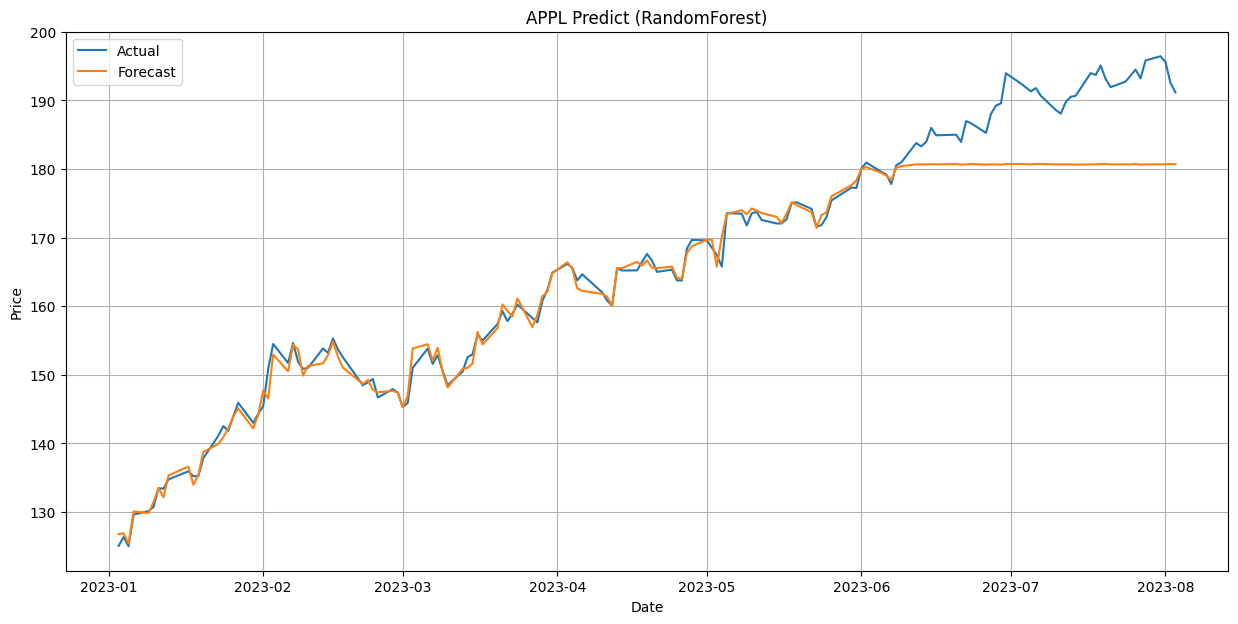

In [665]:
train = appl[appl.index.year < 2023]
test = appl[appl.index.year == 2023]

X_train = train.iloc[:-1].values
X_test = test.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features="auto", min_samples_leaf=1, min_samples_split=6, n_estimators=100) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(test.iloc[1:].index), y_test)
plt.plot(pd.to_datetime(test.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (RandomForest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

        fit_time  score_time  test_score  train_score
case1   0.276062    0.006001    0.479935     0.998830
case2   0.273062    0.005001    0.987507     0.999043
case3   0.274062    0.005001    0.966106     0.999082
case4   0.289065    0.007002    0.978793     0.999044
case5   0.277063    0.006001    0.927630     0.998958
case6   0.271062    0.006001    0.980079     0.999019
case7   0.275062    0.006002    0.985751     0.999033
case8   0.279063    0.006002    0.952685     0.999044
case9   0.282063    0.005002    0.857398     0.999044
case10  0.274062    0.009011    0.835185     0.998815
case11  0.280063    0.006001   -0.067828     0.998575 

cross-val score mean: 0.8075673176578558 

MAE:           3.4171995241445265
MSE:           35.04372128428433
R^2:           0.9005393785904195


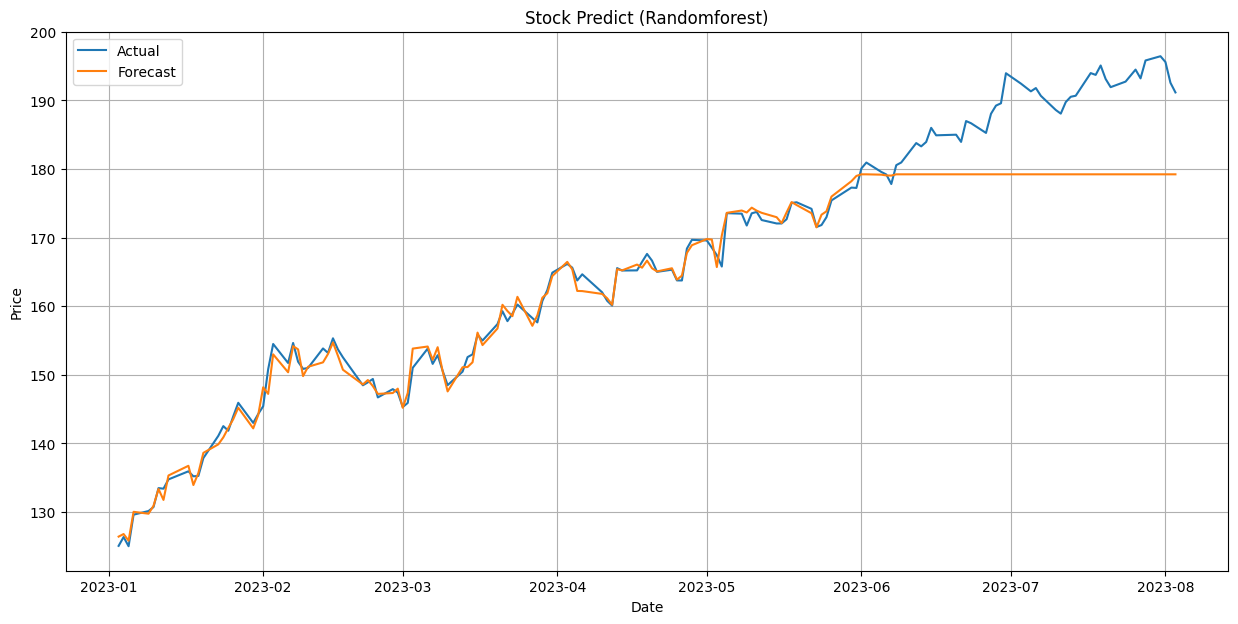

In [666]:
train = appl[appl.index.year < 2023]
test = appl[appl.index.year == 2023]

X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features=1.0, min_samples_leaf=5, min_samples_split=6, n_estimators=100) 
rfs = cross_validate(rf, X, y, cv=11, return_train_score=True)

cross_val_df = pd.DataFrame(rfs, index = ['case1', 'case2', 'case3', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9', 'case10', 'case11'])

print(cross_val_df, '\n')
print(f'cross-val score mean: {cross_val_df["test_score"].mean()}', '\n')

rf.fit(X_train, y_train)
yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')


plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(test.iloc[1:].index), y_test)
plt.plot(pd.to_datetime(test.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("Stock Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

In [480]:
rf.predict([[192.58, 195.04, 195.18, 191.85, 50389300, 1.58]])

array([179.23405118])

### KNN

***************** Neighbors = 3 *******************
MAE:            3.9232426303854933
RMSE:           39.434440891912466
R^2:           0.8880776968795288


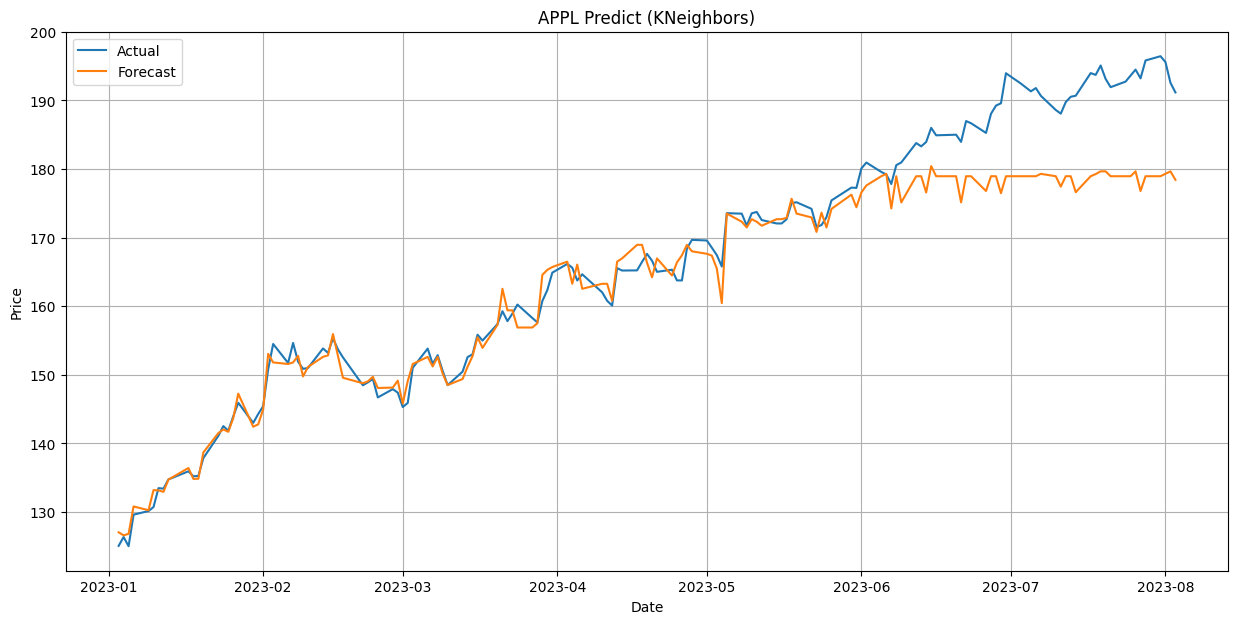

In [481]:
train = appl[appl.index.year < 2023]
valid = appl[appl.index.year >= 2023]

X_train = train.iloc[:-1].values
X_valid = valid.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_valid = valid.iloc[1:, 0].values

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)


kn = KNeighborsRegressor(3) 
kn.fit(X_train, y_train)

yhat = kn.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = kn.score(X_valid, y_valid)

print(f'***************** Neighbors = {3} *******************')
print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(valid.iloc[1:].index), y_valid)
plt.plot(pd.to_datetime(valid.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (KNeighbors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

해외주식 경우에는 api 응답속도가 느려서 예측프로그램을 참고로 수동매매 하는게 나음 <br>
정확도가 99.4%라고 치면 1~2% 오르는 주식같은 경우에는 오차가 작아도 엄청 크게 작용함. <br>
예측한값 -2%라고 보수적으로 잡아놓고 ex) 예측상승률-2% = 5%일 때 매도 <br>
여러 모델을 만들어 놓고 모든 모델이 오른다고 예측한다면 매수.


---

# yahoo finance data

# Shallow Learning

## Library Used

In [57]:
# Data downloading library
import yfinance as yf

# basic
import os
import random
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Shallow learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Deep learning
import torch

# Metrics
import sklearn.metrics as metrics

## Config

In [58]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

In [59]:
# Download historical stock data of Apple (AAPL) using yfinance (yf) library
# DataFrame "last_update": 2003-08-05 ~ today (2023-08-06)
# 특이 Case로, APPl의 2023.06의 데이터부터 모델이 예측을 포기하는 현상이 발견된다.
# 다른 종목들에 대해서는, 이런 현상이 모두 나타나지 않는다.
# NVDA에서도 AAPL과 똑같은 현상
# MSFT 성능 그나마 제일 좋게 나옴

yesterday = datetime.now() - relativedelta(days=1)  # 어제 날짜
term = 20   # 기간 (years)

start = yesterday - relativedelta(years=term)
end = yesterday

last_update = yf.download('AAPL',
                   start = '2003-08-03',
                   end = '2023-08-05',
                   progress = False)

In [60]:
df = last_update.copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-04,0.366607,0.383929,0.362143,0.378750,0.321916,230115200
2003-08-05,0.381250,0.382143,0.358929,0.363929,0.309319,249440800
2003-08-06,0.358214,0.360179,0.348214,0.350536,0.297936,245464800
2003-08-07,0.352321,0.358750,0.346786,0.355893,0.302489,174378400
2003-08-08,0.359107,0.359464,0.350000,0.350714,0.298087,137659200
...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300


In [61]:
# 일 등락률 = (오늘종가 – 어제종가) / 어제종가 * 100

df["Change"] = df["Close"].pct_change() * 100
#df["Change"] = (df["Adj Close"]-df["Adj Close"].shift(1)) / df["Adj Close"].shift(1) * 100
df = df.iloc[1:, :]
df


,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2003-08-05,0.381250,0.382143,0.358929,0.363929,0.309319,249440800,-3.913133
2003-08-06,0.358214,0.360179,0.348214,0.350536,0.297936,245464800,-3.680117
2003-08-07,0.352321,0.358750,0.346786,0.355893,0.302489,174378400,1.528230
2003-08-08,0.359107,0.359464,0.350000,0.350714,0.298087,137659200,-1.455209
2003-08-11,0.353929,0.355893,0.348393,0.351071,0.298390,137228000,0.101793
...,...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100,0.316599
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100,-0.427588
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300,-1.549000


In [62]:
# feature 추가 함수

def addFeature(df, featureCode, colName):
    new_feature = yf.download(featureCode,
                    start = '2003-08-03',
                    end = '2023-08-05',
                    progress = False)
    
    df[colName] = new_feature["Close"]

    return df

In [77]:
# S&P500: ^GSPC
# S&P500 future: ES=F
# Nasdaq future: NQ=F
# 미국 5년 만기 국채 이자율(Treasury interest rates(5)): ^FVX
# 미국 10년 만기 국채 이자율: ^TNX
# US dollar index(세계 주요 6개국 통화에 대비 미국 달러의 평균적인 가치를 나타내는 지표): DX-Y.NYB
# Crude Oil(원유 선물): CL=F

addFeature(df, featureCode="CL=F", colName="Crude oil")
addFeature(df, featureCode="NQ=F", colName="Nasdaq future")

,Open,High,Low,Close,Volume,Change,Crude oil,Nasdaq future
Date,,,,,,,,
2003-08-05,0.381250,0.382143,0.358929,0.363929,249440800,-3.913133,32.220001,1216.00
2003-08-06,0.358214,0.360179,0.348214,0.350536,245464800,-3.680117,31.700001,1214.50
2003-08-07,0.352321,0.358750,0.346786,0.355893,174378400,1.528230,32.389999,1219.50
2003-08-08,0.359107,0.359464,0.350000,0.350714,137659200,-1.455209,32.180000,1210.50
2003-08-11,0.353929,0.355893,0.348393,0.351071,137228000,0.101793,32.009998,1222.50
...,...,...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,38824100,0.316599,81.800003,15857.50
2023-08-01,196.240005,196.729996,195.279999,195.610001,35175100,-0.427588,81.370003,15817.25
2023-08-02,195.039993,195.179993,191.850006,192.580002,50389300,-1.549000,79.489998,15473.00


In [64]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Change            0
Crude oil        10
Nasdaq future     2
dtype: int64

In [65]:
df = df.dropna(axis=0)
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Change           0
Crude oil        0
Nasdaq future    0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5025 entries, 2003-08-05 to 2023-08-04
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           5025 non-null   float64
 1   High           5025 non-null   float64
 2   Low            5025 non-null   float64
 3   Close          5025 non-null   float64
 4   Adj Close      5025 non-null   float64
 5   Volume         5025 non-null   int64  
 6   Change         5025 non-null   float64
 7   Crude oil      5025 non-null   float64
 8   Nasdaq future  5025 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 392.6 KB


In [67]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Change,Crude oil,Nasdaq future
count,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5.025000e+03,5025.000000,5025.000000,5025.000000
mean,39.262919,39.699941,38.842627,39.288723,37.836206,4.115269e+08,0.142877,69.142927,4956.408197
std,49.524137,50.108420,48.987212,49.572660,49.561333,3.948019e+08,2.101147,23.026916,4127.182972
min,0.350893,0.353571,0.343750,0.350536,0.297936,3.145820e+07,-17.919520,-37.630001,1039.500000
25%,4.997857,5.055714,4.910714,4.995714,4.246071,1.186556e+08,-0.870204,50.900002,1798.000000
50%,20.076429,20.267857,19.848213,20.035357,17.305313,2.786028e+08,0.100807,66.500000,3081.000000
75%,44.625000,45.025002,44.220001,44.610001,42.532085,5.779704e+08,1.209979,87.699997,6960.000000
max,196.240005,198.229996,195.279999,196.449997,196.449997,3.372970e+09,13.904945,145.289993,16575.000000


In [68]:
# Making sure the DataFrame is in ascending order based on the "Date" column
df = df.sort_values(by='Date', ascending=True)
df

,Open,High,Low,Close,Adj Close,Volume,Change,Crude oil,Nasdaq future
Date,,,,,,,,,
2003-08-05,0.381250,0.382143,0.358929,0.363929,0.309319,249440800,-3.913133,32.220001,1216.00
2003-08-06,0.358214,0.360179,0.348214,0.350536,0.297936,245464800,-3.680117,31.700001,1214.50
2003-08-07,0.352321,0.358750,0.346786,0.355893,0.302489,174378400,1.528230,32.389999,1219.50
2003-08-08,0.359107,0.359464,0.350000,0.350714,0.298087,137659200,-1.455209,32.180000,1210.50
2003-08-11,0.353929,0.355893,0.348393,0.351071,0.298390,137228000,0.101793,32.009998,1222.50
...,...,...,...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100,0.316599,81.800003,15857.50
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100,-0.427588,81.370003,15817.25
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300,-1.549000,79.489998,15473.00


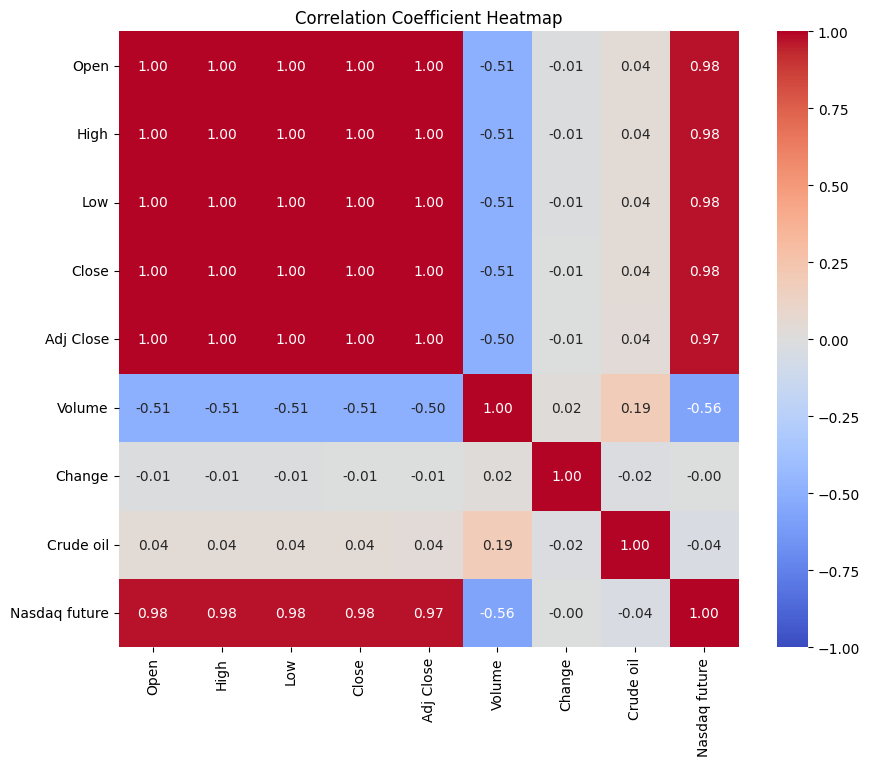

% of highly correlated pairs: 49.4 %


In [69]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            fmt='.2f')

# Add a title to the heatmap
plt.title("Correlation Coefficient Heatmap")

# Show the plot
plt.show()

# Find pairs of columns with correlation coefficients >= 0.5 or <= -0.5
high_corr = 0
num_cols = len(df.columns)
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2 and abs(correlation_matrix.loc[column1, column2]) >= 0.5:
            high_corr += 1
print(f"% of highly correlated pairs: {high_corr/(num_cols**2)*100:.1f} %")

<AxesSubplot: >

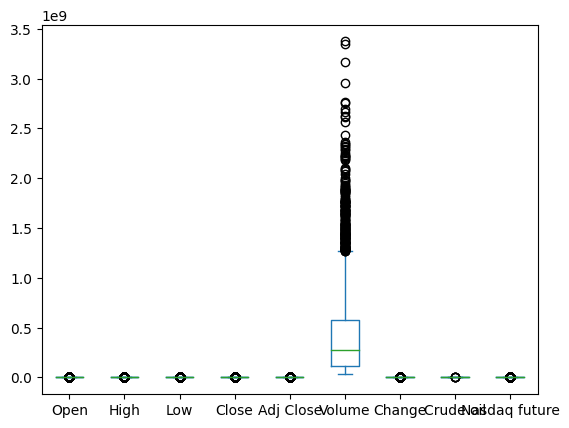

In [70]:
df.plot.box()

In [71]:
df = df.drop(columns=['Adj Close'])

In [72]:
def setColumns(df):
    columns = list(df.columns)
    columns.remove("Close")
    columns.insert(0, "Close")
    df[columns]

setColumns(df)
df

,Open,High,Low,Close,Volume,Change,Crude oil,Nasdaq future
Date,,,,,,,,
2003-08-05,0.381250,0.382143,0.358929,0.363929,249440800,-3.913133,32.220001,1216.00
2003-08-06,0.358214,0.360179,0.348214,0.350536,245464800,-3.680117,31.700001,1214.50
2003-08-07,0.352321,0.358750,0.346786,0.355893,174378400,1.528230,32.389999,1219.50
2003-08-08,0.359107,0.359464,0.350000,0.350714,137659200,-1.455209,32.180000,1210.50
2003-08-11,0.353929,0.355893,0.348393,0.351071,137228000,0.101793,32.009998,1222.50
...,...,...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,38824100,0.316599,81.800003,15857.50
2023-08-01,196.240005,196.729996,195.279999,195.610001,35175100,-0.427588,81.370003,15817.25
2023-08-02,195.039993,195.179993,191.850006,192.580002,50389300,-1.549000,79.489998,15473.00


In [73]:
X = df.iloc[:-1]
y = df.iloc[1:, 0]

In [74]:
X_train = X[X.index.year < 2023].values
X_test = X[X.index.year == 2023].values

y_train = y[y.index <= np.datetime64('2023-01-03')].values
y_test = y[y.index.year == 2023][1:].values
n_data = len(y)

print(f'X: \ntrain shape: {X_train.shape}, {int(X_train.shape[0]/n_data*100)} % \ntest shape: {X_test.shape}, {int(X_test.shape[0]/n_data*100)} %')
print(f'y: \ntrain shape: {y_train.shape}, {int(y_train.shape[0]/n_data*100)} % \ntest shape: {y_test.shape}, {int(y_test.shape[0]/n_data*100)} %')

X: 
train shape: (4877, 8), 97 % 
test shape: (147, 8), 2 %
y: 
train shape: (4877,), 97 % 
test shape: (147,), 2 %


c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE:           3.2442226525149094
MSE:           29.385528205648587
R^2:           0.916762195023101


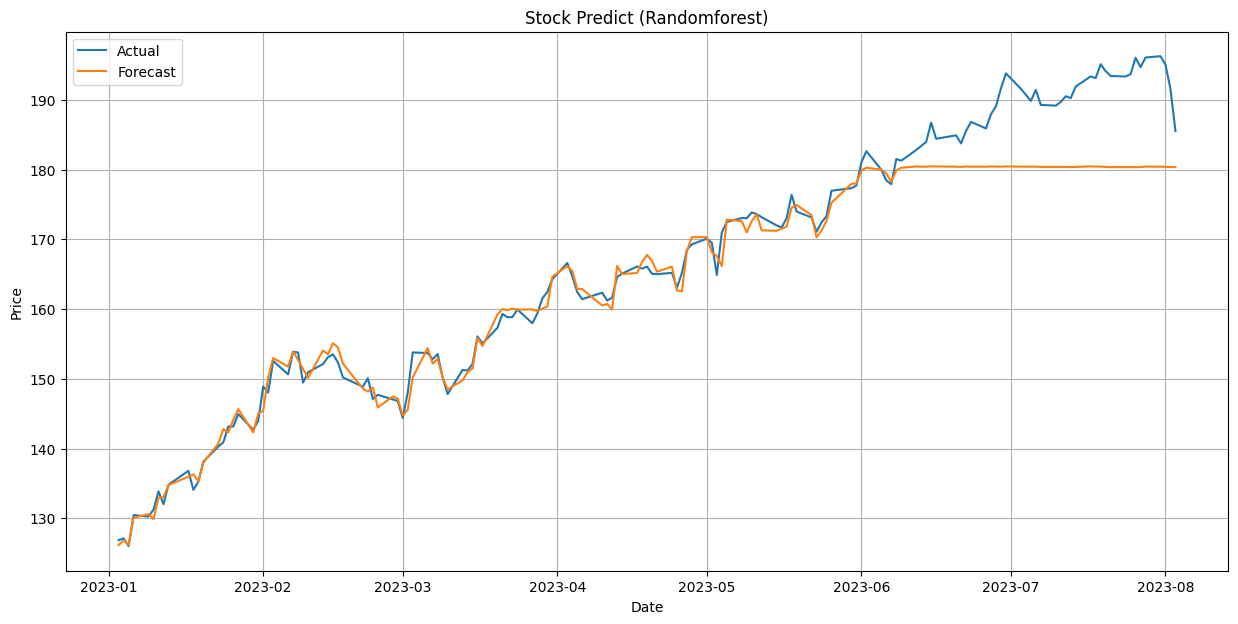

In [76]:
rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features="auto", min_samples_leaf=1, min_samples_split=6, n_estimators=100) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')

X_test_idx = X[X.index.year == 2023].index

plt.figure(figsize=(15, 7))
plt.plot(X_test_idx, y_test)
plt.plot(X_test_idx, yhat)
plt.legend(["Actual", "Forecast"])
plt.title("Stock Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()


# stock = GOOG
# columns = "Close", "Open", "High", "Low", "Volume"
# term = 5)  MAE: 2.112100707592608,  MSE: 7.547230740923123,  R^2: 0.9549159134834734
# term = 10) MAE: 2.072141540942549,  MSE: 7.093291730724242,  R^2: 0.9576275604850767  >>> best?
# term = 20) MAE: 2.1226738842814954, MSE: 7.4114207847891285, R^2: 0.9557271869190331
# term = 40) MAE: 2.1226738842814954, MSE: 7.4114207847891285, R^2: 0.9557271869190331


#################################################

# columns = "Close", "Open", "High", "Low", "Volume"
# MAE:           2.11987169019219
# MSE:           7.341723714218125
# R^2:           0.9561435288684761

# columns = "Close", "Open", "High", "Low", "Volume", "Change"  >>> good
# MAE:           2.0323159499395462
# MSE:           6.882812590580972
# R^2:           0.9588848772532907

# columns = "Close", "Open", "High", "Low", "Volume", "S&P500"  >>> ?
# MAE:           2.106664777483258
# MSE:           7.546347929611459
# R^2:           0.9549211870391549

# columns = "Close", "Open", "High", "Low", "Volume", "Crod oil"
# MAE:           2.1049465532121796
# MSE:           7.016866732615147
# R^2:           0.9586566660779635

# columns = "Close", "Open", "High", "Low", "Volume", "S&P500 futue"    >>> good
# MAE:           2.0755342730048563
# MSE:           7.059418065460446
# R^2:           0.957829907982829

# columns = "Close", "Open", "High", "Low", "Volume", "Nasdaq future"   >>> good
# MAE:           2.1079902804627717
# MSE:           7.041222645297052
# R^2:           0.9579386000216722

# columns = "Close", "Open", "High", "Low", "Volume", "Bond rates(5)"   >>> bad
# MAE:           2.1645695864100034
# MSE:           7.4872877896440295
# R^2:           0.9552739882918755

# columns = "Close", "Open", "High", "Low", "Volume", "Bond rates(10)"  >>> bad
# MAE:           2.1321283535081514
# MSE:           7.590575644704663
# R^2:           0.9546569886593599

# columns = "Close", "Open", "High", "Low", "Volume", "Dollar index"    >>> good
# MAE:           2.060810230281078
# MSE:           6.968373603847073
# R^2:           0.9583737705630428

# columns = "Close", "Open", "High", "Low", "Volume", "Nasdaq future", "Change"
# MAE:           2.0474863750431815
# MSE:           6.711704726741979
# R^2:           0.9599070060316183

# columns = "Close", "Open", "High", "Low", "Volume", "Change", "S&P500 future", "Dollar index"
# MAE:           2.030563883878747
# MSE:           6.826729953253438
# R^2:           0.9592198921163769


KFold, cross_val_score, cross_validate

       fit_time  score_time  test_score  train_score
case1  1.919412    0.008002   -1.345423     0.999857
case2  1.912495    0.008002    0.910507     0.999863
case3  1.885813    0.009001    0.888064     0.999874
case4  2.000725    0.009002    0.984839     0.999882
case5  1.797470    0.008003   -1.798341     0.999853 

cross-val score mean: -0.0720707060492705 

MAE:           3.553566438172508
MSE:           35.17879240081634
R^2:           0.900352124328359


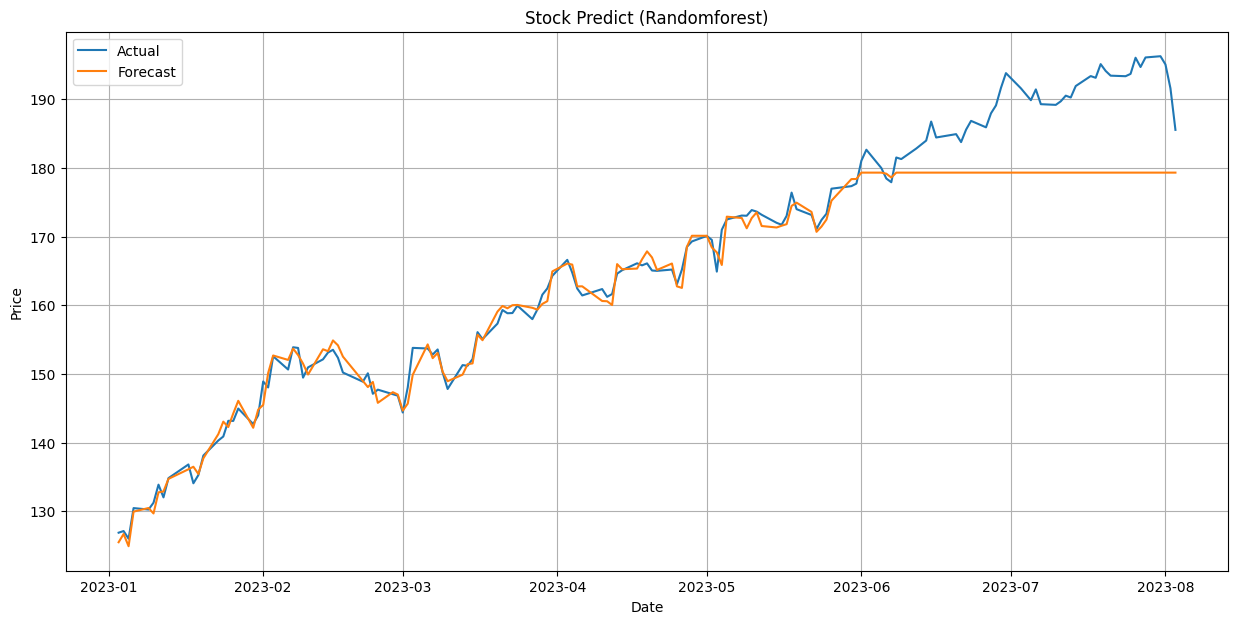

In [ ]:
rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features=1.0, min_samples_leaf=5, min_samples_split=6, n_estimators=100) 

######
rfs = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True)
cross_val_df = pd.DataFrame(rfs, index = ["case"+str(i) for i in range(1, 6)])

print(cross_val_df, '\n')
print(f'cross-val score mean: {cross_val_df["test_score"].mean()}', '\n')
#######

rf.fit(X_train, y_train)
yhat = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = rf.score(X_test, y_test)

print(f'MAE:           {mae}')
print(f'MSE:           {mse}')
print(f'R^2:           {R2}')


plt.figure(figsize=(15, 7))
plt.plot(X_test_idx, y_test)
plt.plot(X_test_idx, yhat)
plt.legend(["Actual", "Forecast"])
plt.title("Stock Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

In [ ]:
rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=16, max_features=1.0, min_samples_leaf=5, min_samples_split=6, n_estimators=100) 
cv_scores = []

for i in range(2, 21):
    scores = cross_val_score(rf, X_train, y_train, cv=i, scoring="r2")
    print(f'cv={i} # cross_val_score: {scores.mean()}')



cv=2 # cross_val_score: -0.9742630407194951
cv=3 # cross_val_score: -1.227507046519838
cv=4 # cross_val_score: 0.20558043619222421
cv=5 # cross_val_score: -0.06481045516607456
cv=6 # cross_val_score: -0.7664824527286846
cv=7 # cross_val_score: -0.189451871461866
cv=8 # cross_val_score: -0.3410690933132205
cv=9 # cross_val_score: 0.10695546191732536
cv=10 # cross_val_score: 0.39014208016759844
cv=11 # cross_val_score: 0.49064027215327694
cv=12 # cross_val_score: 0.3937139740533461
cv=13 # cross_val_score: 0.31766245225730366
cv=14 # cross_val_score: 0.20775358265865437
cv=15 # cross_val_score: -0.08063115471961217
cv=16 # cross_val_score: -0.2635798184646375
cv=17 # cross_val_score: 0.13228052385391187
cv=18 # cross_val_score: 0.3906877559939168
cv=19 # cross_val_score: 0.5262552280561529
cv=20 # cross_val_score: 0.7747592233984276


In [ ]:
X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

params ={
    'n_estimators':[50, 100, 200],
    'max_depth':[8 ,10, 12, 14, 16],
    'min_samples_leaf':[1, 2, 4, 6, 8],
    'min_samples_split':[4, 6, 8, 10, 12],
    "max_features"      : ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
}

rf = RandomForestRegressor(random_state=42) 
rf.fit(X_train, y_train)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(f"Best Param: {grid_cv.best_params_}")
max_depth = grid_cv.best_params_['max_depth']
min_samples_leaf = grid_cv.best_params_['min_samples_leaf']
min_samples_split = grid_cv.best_params_['min_samples_split']
n_estimators = grid_cv.best_params_['n_estimators']

#각 열 추출해서 R Score값 비교
rf = RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
rf.fit(X_train,y_train)


In [ ]:
X_test_idx = X[X.index.year == 2023].index

ss = StandardScaler()
X_train_ = ss.fit_transform(X_train)
X_test_ = ss.transform(X_test)

params = {"n_neighbors": [i for i in range(2, 101)]}

kn = KNeighborsRegressor(3) 
kn.fit(X_train_, y_train)
grid_cv = GridSearchCV(kn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(f"Best Param: {grid_cv.best_params_}")
n_neighbors = grid_cv.best_params_['n_neighbors']

yhat = kn.predict(X_test_)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = kn.score(X_test_, y_test)

print(f'***************** Neighbors = {3} *******************')
print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(X_test_idx, y_test)
plt.plot(X_test_idx, yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (KNeighbors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

Best Param: {'n_neighbors': 50}
***************** Neighbors = 50 *******************
MAE:            4.603423864663052
RMSE:           42.29920619298787
R^2:           0.880182753526521


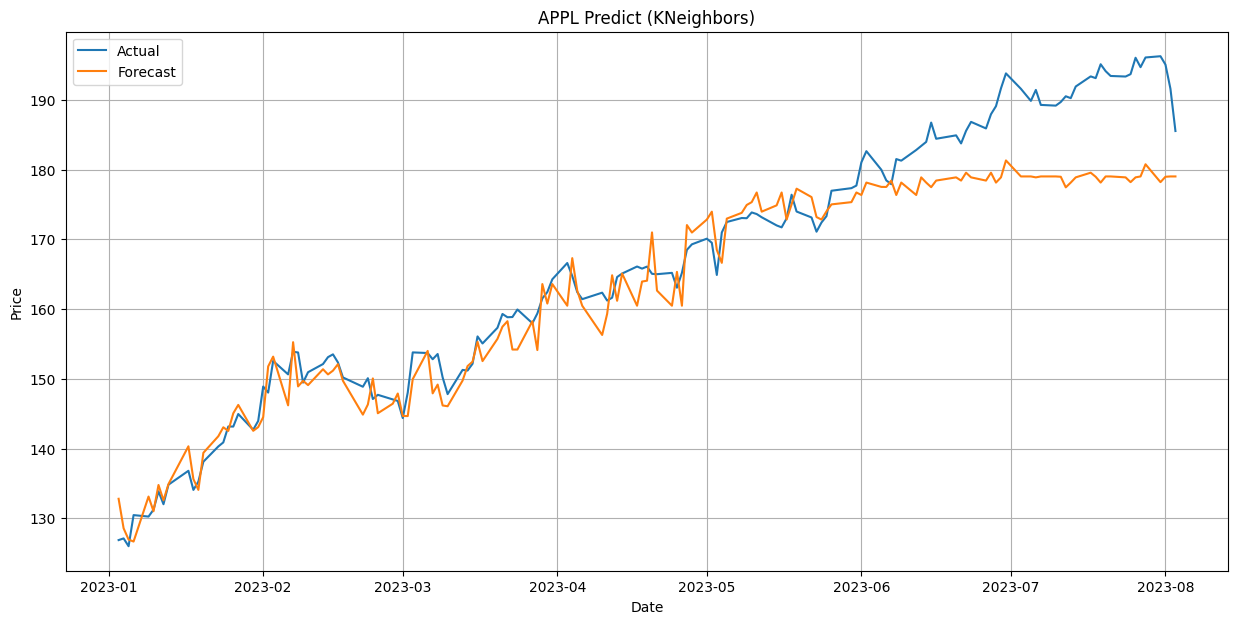

In [28]:
X_test_idx = X[X.index.year == 2023].index

ss = StandardScaler()
X_train_ = ss.fit_transform(X_train)
X_test_ = ss.transform(X_test)

params = {"n_neighbors": [i for i in range(2, 101, 2)]}

kn = KNeighborsRegressor(3) 
kn.fit(X_train_, y_train)
grid_cv = GridSearchCV(kn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(f"Best Param: {grid_cv.best_params_}")
n_neighbors = grid_cv.best_params_['n_neighbors']

yhat = kn.predict(X_test_)
mae = metrics.mean_absolute_error(y_test, yhat)
mse = metrics.mean_squared_error(y_test, yhat)
R2 = kn.score(X_test_, y_test)

print(f'***************** Neighbors = {n_neighbors} *******************')
print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(X_test_idx, y_test)
plt.plot(X_test_idx, yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (KNeighbors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()